In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# menyimpan data csv ke dalam variable
data = pd.read_csv('placement.csv')

# cetak data
print(data)

     cgpa  exam_marks  placed
0    7.19        26.0       1
1    7.46        38.0       1
2    7.54        40.0       1
3    6.42         8.0       1
4    7.23        17.0       0
..    ...         ...     ...
995  8.87        44.0       1
996  9.12        65.0       1
997  4.89        34.0       0
998  8.62        46.0       1
999  4.90        10.0       1

[1000 rows x 3 columns]


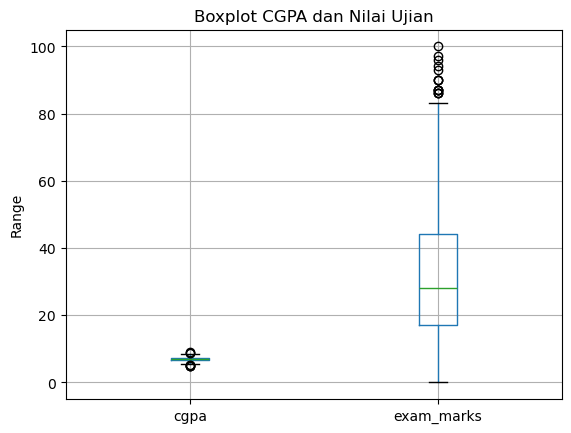

In [3]:
# membuat grafik
data.boxplot(column=['cgpa', 'exam_marks'])
plt.title('Boxplot CGPA dan Nilai Ujian')
plt.ylabel('Range')

# mencetak hasil grafik
plt.show()

In [4]:
# data outlier cgpa
# menghitung kuartil pertama
q1 = np.quantile(data['cgpa'], 0.25)
print("Q1: ", q1)
# menghitung kuartil ketiga
q3 = np.quantile(data['cgpa'], 0.75)
print("Q3: ", q3)
iqr = q3 - q1
# menghitung batas bawah dan batas atas
batas_bawah_cgpa = q1 - 1.5 * iqr
batas_atas_cgpa = q3 + 1.5 * iqr

# mencari outlier dalam data CGPA
outliers_cgpa = data[(data['cgpa'] < batas_bawah_cgpa) | (data['cgpa'] > batas_atas_cgpa)]

# mencetak data outlier CGPA
print("Outlier CGPA: ")
print(outliers_cgpa)

Q1:  6.55
Q3:  7.37
Outlier CGPA: 
     cgpa  exam_marks  placed
278  5.23        17.0       1
485  4.92        44.0       1
815  5.27        43.0       0
995  8.87        44.0       1
996  9.12        65.0       1
997  4.89        34.0       0
998  8.62        46.0       1
999  4.90        10.0       1


In [5]:
# data outlier nilai ujian
# menghitung kuartil pertama
q1 = np.quantile(data['exam_marks'], 0.25)
print("Q1: ", q1)
# mitung kuartil ketiga
q3 = np.quantile(data['exam_marks'], 0.75)
print("Q3: ", q3)
iqr = q3 - q1
# Hitung batas bawah dan batas atas
batas_bawah_marks = q1 - 1.5 * iqr
batas_atas_marks = q3 + 1.5 * iqr

# mencari outlier dalam data nilai ujian
outliers_marks = data[(data['exam_marks'] < batas_bawah_marks) | (data['exam_marks'] > batas_atas_marks)]

# mencetak data outlier nilai ujian
print("Outlier Nilai Ujian: ")
print(outliers_marks)

Q1:  17.0
Q3:  44.0
Outlier Nilai Ujian: 
     cgpa  exam_marks  placed
9    7.75        94.0       1
40   6.60        86.0       1
61   7.51        86.0       0
134  6.33        93.0       0
162  7.80        90.0       0
283  7.09        87.0       0
290  8.38        87.0       0
311  6.97        87.0       1
324  6.64        90.0       0
630  6.56        96.0       1
685  6.05        87.0       1
730  6.14        90.0       1
771  7.31        86.0       1
846  6.99        97.0       0
917  5.95       100.0       0


In [6]:
# memasukkan data outlier CGPA dan nilai ujian ke dalam variable
outliers = ((data['cgpa'] < batas_bawah_cgpa) | (data['cgpa'] > batas_atas_cgpa) |
            (data['exam_marks'] < batas_bawah_marks) | (data['exam_marks'] > batas_atas_marks))

# membuat variable untuk menampung data tanpa outlier
data_bersih = data[~outliers]

# mencetak data tanpa outlier
print(data_bersih)

     cgpa  exam_marks  placed
0    7.19        26.0       1
1    7.46        38.0       1
2    7.54        40.0       1
3    6.42         8.0       1
4    7.23        17.0       0
..    ...         ...     ...
990  6.17        33.0       1
991  7.04        57.0       0
992  6.26        12.0       0
993  6.73        21.0       1
994  6.48        63.0       0

[977 rows x 3 columns]


In [7]:
# menghitung rata-rata cgpa
print('Rata-rata awal nilai ujian: ', np.mean(data['exam_marks']))

print('Rata-rata akhir nilai ujian: ', np.mean(data_bersih['exam_marks']))

Rata-rata awal nilai ujian:  32.225
Rata-rata akhir nilai ujian:  31.285568065506652


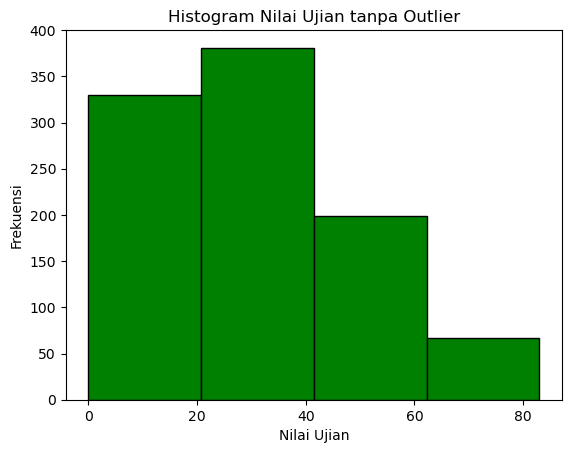

In [8]:
# membuat grafik nilai ujian tanpa outlier
plt.hist(data_bersih['exam_marks'], bins=4, color='green', edgecolor='black')
plt.title('Histogram Nilai Ujian tanpa Outlier')
plt.xlabel('Nilai Ujian')
plt.ylabel('Frekuensi')

# mencetak hasil grafik
plt.show()